In [1]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from six.moves import urllib
warnings.filterwarnings("ignore")
%matplotlib inline
import os

In [2]:
df=pd.read_csv("D:\ineuron\EDA _Dataset\Dataset\Data11\googleplaystore.csv")

In [3]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [4]:
df.tail()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device
10840,iHoroscope - 2018 Daily Horoscope & Astrology,LIFESTYLE,4.5,398307,19M,"10,000,000+",Free,0,Everyone,Lifestyle,"July 25, 2018",Varies with device,Varies with device


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [6]:
df.shape

(10841, 13)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
App,10841,9660,ROBLOX,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Category,10841,34,FAMILY,1972,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Rating,9367.0,NaN,NaN,NaN,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0
Reviews,10841,6002,0,596,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Size,10841,462,Varies with device,1695,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Installs,10841,22,"1,000,000+",1579,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Type,10840,3,Free,10039,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Price,10841,93,0,10040,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Content Rating,10840,6,Everyone,8714,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Genres,10841,120,Tools,842,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df['Reviews'].shape

(10841,)

In [9]:
df.Reviews.str.isnumeric().sum()

10840

In [10]:
df[~df.Reviews.str.isnumeric()]  # one row is catogorical reviwes 3.0M so M 

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


In [11]:
df_copy=df.copy()

df_copy=df_copy.drop(df_copy.index[10472]).reset_index(drop=True)

df_copy["Reviews"]=df_copy["Reviews"].astype('float')


In [12]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [13]:
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [14]:
# Spaces were fixed in the column names remove the spaces if any
df_copy.columns = df_copy.columns.str.strip()
df_copy.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [15]:
df_copy["Reviews"].dtype

dtype('float64')

In [16]:
df_copy['Size']=df_copy['Size'].str.replace('M','000000')
df_copy['Size']=df_copy['Size'].str.replace('k','000')

In [17]:
df_copy['Size']

0                  19000000
1                  14000000
2                 8.7000000
3                  25000000
4                 2.8000000
                ...        
10835              53000000
10836             3.6000000
10837             9.5000000
10838    Varies with device
10839              19000000
Name: Size, Length: 10840, dtype: object

In [18]:
df_copy['Size'].unique()

array(['19000000', '14000000', '8.7000000', '25000000', '2.8000000',
       '5.6000000', '29000000', '33000000', '3.1000000', '28000000',
       '12000000', '20000000', '21000000', '37000000', '2.7000000',
       '5.5000000', '17000000', '39000000', '31000000', '4.2000000',
       '7.0000000', '23000000', '6.0000000', '6.1000000', '4.6000000',
       '9.2000000', '5.2000000', '11000000', '24000000',
       'Varies with device', '9.4000000', '15000000', '10000000',
       '1.2000000', '26000000', '8.0000000', '7.9000000', '56000000',
       '57000000', '35000000', '54000000', '201000', '3.6000000',
       '5.7000000', '8.6000000', '2.4000000', '27000000', '2.5000000',
       '16000000', '3.4000000', '8.9000000', '3.9000000', '2.9000000',
       '38000000', '32000000', '5.4000000', '18000000', '1.1000000',
       '2.2000000', '4.5000000', '9.8000000', '52000000', '9.0000000',
       '6.7000000', '30000000', '2.6000000', '7.1000000', '3.7000000',
       '22000000', '7.4000000', '6.4000000

In [19]:

df_copy["Size"]=df_copy["Size"].str.replace("Varies with device", str(np.nan))


In [20]:
df_copy['Size']=df_copy["Size"].astype(float)

In [21]:

for i in df_copy['Size']:
    if i < 10:
        df_copy['Size']=df_copy['Size'].replace(i,i*1000)


In [22]:
 df_copy['Size'].unique()

array([1.90e+07, 1.40e+07, 8.70e+03, 2.50e+07, 2.80e+03, 5.60e+03,
       2.90e+07, 3.30e+07, 3.10e+03, 2.80e+07, 1.20e+07, 2.00e+07,
       2.10e+07, 3.70e+07, 2.70e+03, 5.50e+03, 1.70e+07, 3.90e+07,
       3.10e+07, 4.20e+03, 7.00e+03, 2.30e+07, 6.00e+03, 6.10e+03,
       4.60e+03, 9.20e+03, 5.20e+03, 1.10e+07, 2.40e+07,      nan,
       9.40e+03, 1.50e+07, 1.00e+07, 1.20e+03, 2.60e+07, 8.00e+03,
       7.90e+03, 5.60e+07, 5.70e+07, 3.50e+07, 5.40e+07, 2.01e+05,
       3.60e+03, 5.70e+03, 8.60e+03, 2.40e+03, 2.70e+07, 2.50e+03,
       1.60e+07, 3.40e+03, 8.90e+03, 3.90e+03, 2.90e+03, 3.80e+07,
       3.20e+07, 5.40e+03, 1.80e+07, 1.10e+03, 2.20e+03, 4.50e+03,
       9.80e+03, 5.20e+07, 9.00e+03, 6.70e+03, 3.00e+07, 2.60e+03,
       7.10e+03, 3.70e+03, 2.20e+07, 7.40e+03, 6.40e+03, 3.20e+03,
       8.20e+03, 9.90e+03, 4.90e+03, 9.50e+03, 5.00e+03, 5.90e+03,
       1.30e+07, 7.30e+07, 6.80e+03, 3.50e+03, 4.00e+03, 2.30e+03,
       7.20e+03, 2.10e+03, 4.20e+07, 7.30e+03, 9.10e+03, 5.50e

In [23]:
char_to_remove=['+','$',','] 
col_to_clean=['Price','Installs']
for item in char_to_remove:
    for col in col_to_clean:
        df_copy[col]=df_copy[col].str.replace(item,'')


In [24]:
df_copy['Price'].unique()

array(['0', '4.99', '3.99', '6.99', '1.49', '2.99', '7.99', '5.99',
       '3.49', '1.99', '9.99', '7.49', '0.99', '9.00', '5.49', '10.00',
       '24.99', '11.99', '79.99', '16.99', '14.99', '1.00', '29.99',
       '12.99', '2.49', '10.99', '1.50', '19.99', '15.99', '33.99',
       '74.99', '39.99', '3.95', '4.49', '1.70', '8.99', '2.00', '3.88',
       '25.99', '399.99', '17.99', '400.00', '3.02', '1.76', '4.84',
       '4.77', '1.61', '2.50', '1.59', '6.49', '1.29', '5.00', '13.99',
       '299.99', '379.99', '37.99', '18.99', '389.99', '19.90', '8.49',
       '1.75', '14.00', '4.85', '46.99', '109.99', '154.99', '3.08',
       '2.59', '4.80', '1.96', '19.40', '3.90', '4.59', '15.46', '3.04',
       '4.29', '2.60', '3.28', '4.60', '28.99', '2.95', '2.90', '1.97',
       '200.00', '89.99', '2.56', '30.99', '3.61', '394.99', '1.26',
       '1.20', '1.04'], dtype=object)

In [25]:
df_copy['Installs'].unique()

array(['10000', '500000', '5000000', '50000000', '100000', '50000',
       '1000000', '10000000', '5000', '100000000', '1000000000', '1000',
       '500000000', '50', '100', '500', '10', '1', '5', '0'], dtype=object)

In [26]:
df_copy["Installs"]=df_copy["Installs"].astype('int')
df_copy["Price"]=df_copy["Price"].astype('float')
df_copy["Rating"]=df_copy["Rating"].astype('float')
df_copy['Last Updated']=pd.to_datetime(df_copy['Last Updated'])

In [27]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   App             10840 non-null  object        
 1   Category        10840 non-null  object        
 2   Rating          9366 non-null   float64       
 3   Reviews         10840 non-null  float64       
 4   Size            9145 non-null   float64       
 5   Installs        10840 non-null  int32         
 6   Type            10839 non-null  object        
 7   Price           10840 non-null  float64       
 8   Content Rating  10840 non-null  object        
 9   Genres          10840 non-null  object        
 10  Last Updated    10840 non-null  datetime64[ns]
 11  Current Ver     10832 non-null  object        
 12  Android Ver     10838 non-null  object        
dtypes: datetime64[ns](1), float64(4), int32(1), object(7)
memory usage: 1.0+ MB


In [28]:
df_copy

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19000000.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14000000.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8700.0,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25000000.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2800.0,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10835,Sya9a Maroc - FR,FAMILY,4.5,38.0,53000000.0,5000,Free,0.0,Everyone,Education,2017-07-25,1.48,4.1 and up
10836,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3600.0,100,Free,0.0,Everyone,Education,2018-07-06,1.0,4.1 and up
10837,Parkinson Exercices FR,MEDICAL,NaN,3.0,9500.0,1000,Free,0.0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10838,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,NaN,1000,Free,0.0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [29]:
df_copy.to_csv("D:\ineuron\EDA _Dataset\Dataset\Data11\cleanedgoogleplaystore.csv",index=False)

In [30]:
# based on reviews app  can be taken

In [31]:
df_copy.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size              1695
Installs             0
Type                 1
Price                0
Content Rating       0
Genres               0
Last Updated         0
Current Ver          8
Android Ver          2
dtype: int64

In [32]:
num1 = [fea for fea in df_copy.columns if df_copy[fea].dtypes!='O']
for i in num1:
    if i!='Last Updated':
        df_copy[i].fillna(int(df_copy[i].mean()),inplace=True)

In [33]:
df_copy.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              1
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       8
Android Ver       2
dtype: int64

In [34]:
df_copy['Category'].value_counts()

FAMILY                 1972
GAME                   1144
TOOLS                   843
MEDICAL                 463
BUSINESS                460
PRODUCTIVITY            424
PERSONALIZATION         392
COMMUNICATION           387
SPORTS                  384
LIFESTYLE               382
FINANCE                 366
HEALTH_AND_FITNESS      341
PHOTOGRAPHY             335
SOCIAL                  295
NEWS_AND_MAGAZINES      283
SHOPPING                260
TRAVEL_AND_LOCAL        258
DATING                  234
BOOKS_AND_REFERENCE     231
VIDEO_PLAYERS           175
EDUCATION               156
ENTERTAINMENT           149
MAPS_AND_NAVIGATION     137
FOOD_AND_DRINK          127
HOUSE_AND_HOME           88
AUTO_AND_VEHICLES        85
LIBRARIES_AND_DEMO       85
WEATHER                  82
ART_AND_DESIGN           65
EVENTS                   64
PARENTING                60
COMICS                   60
BEAUTY                   53
Name: Category, dtype: int64

In [35]:
# cal .Percentage for PieChart
percentage = df_copy.Category.value_counts(normalize=True)*100
percentage

FAMILY                 18.191882
GAME                   10.553506
TOOLS                   7.776753
MEDICAL                 4.271218
BUSINESS                4.243542
PRODUCTIVITY            3.911439
PERSONALIZATION         3.616236
COMMUNICATION           3.570111
SPORTS                  3.542435
LIFESTYLE               3.523985
FINANCE                 3.376384
HEALTH_AND_FITNESS      3.145756
PHOTOGRAPHY             3.090406
SOCIAL                  2.721402
NEWS_AND_MAGAZINES      2.610701
SHOPPING                2.398524
TRAVEL_AND_LOCAL        2.380074
DATING                  2.158672
BOOKS_AND_REFERENCE     2.130996
VIDEO_PLAYERS           1.614391
EDUCATION               1.439114
ENTERTAINMENT           1.374539
MAPS_AND_NAVIGATION     1.263838
FOOD_AND_DRINK          1.171587
HOUSE_AND_HOME          0.811808
AUTO_AND_VEHICLES       0.784133
LIBRARIES_AND_DEMO      0.784133
WEATHER                 0.756458
ART_AND_DESIGN          0.599631
EVENTS                  0.590406
PARENTING 

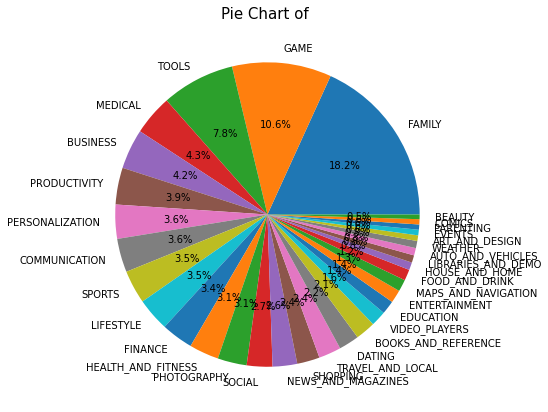

In [36]:
#plotting PieChart
categorylabels =['FAMILY','GAME','TOOLS','MEDICAL','BUSINESS','PRODUCTIVITY','PERSONALIZATION','COMMUNICATION','SPORTS','LIFESTYLE','FINANCE','HEALTH_AND_FITNESS','PHOTOGRAPHY','SOCIAL','NEWS_AND_MAGAZINES','SHOPPING','TRAVEL_AND_LOCAL','DATING','BOOKS_AND_REFERENCE','VIDEO_PLAYERS','EDUCATION','ENTERTAINMENT','MAPS_AND_NAVIGATION', 'FOOD_AND_DRINK','HOUSE_AND_HOME','LIBRARIES_AND_DEMO','AUTO_AND_VEHICLES','WEATHER','ART_AND_DESIGN','EVENTS','PARENTING','COMICS','BEAUTY']
plt.figure(figsize =(12, 7))
plt.pie(percentage,labels = categorylabels ,autopct='%1.1f%%')  
plt.title ("Pie Chart of ", fontsize = 15)
plt.show()

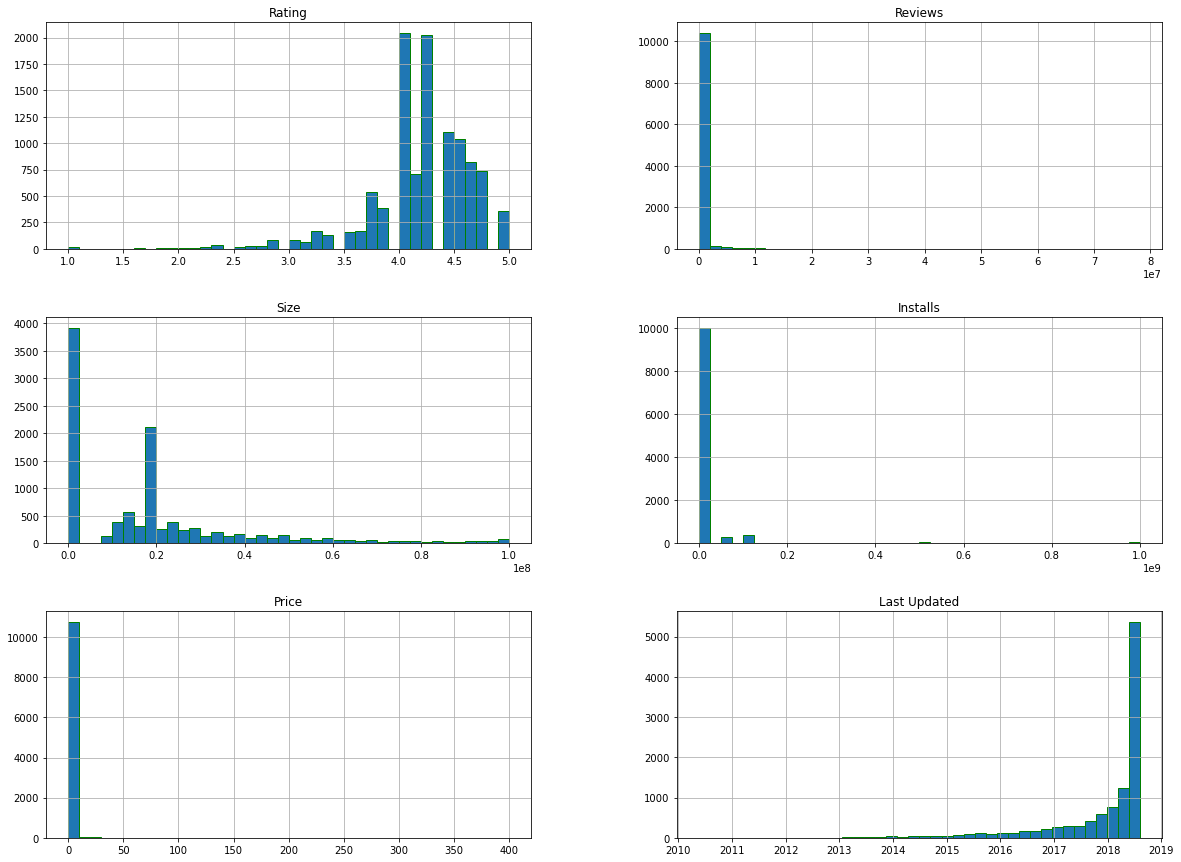

In [38]:
# PLot density plot for all features

df_copy.hist(bins=40, figsize=(20,15), ec = 'g')
plt.show()

In [39]:
df_copy[(list(df.columns)[1:])].corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.075570,0.091969,0.060554,-0.021430
Reviews,0.075570,1.000000,0.125874,0.643122,-0.009667
Size,0.091969,0.125874,1.000000,0.082137,-0.022760
Installs,0.060554,0.643122,0.082137,1.000000,-0.011689
Price,-0.021430,-0.009667,-0.022760,-0.011689,1.000000


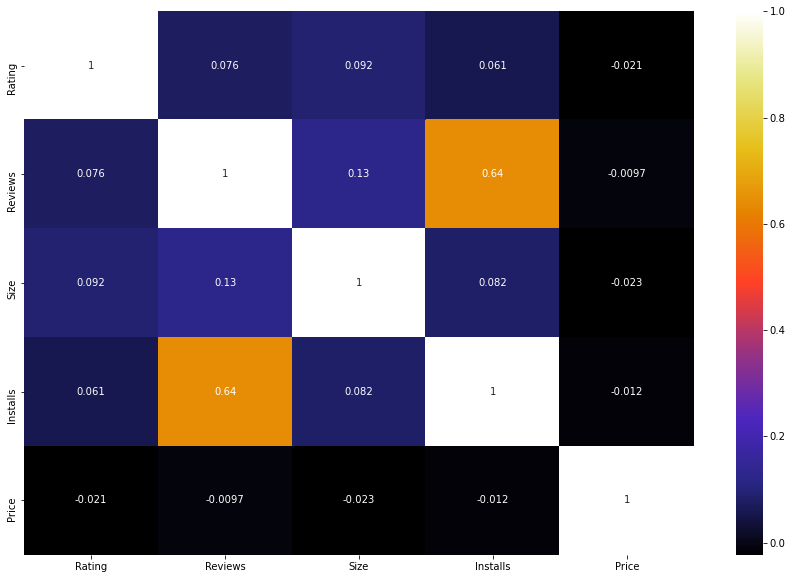

In [40]:
plt.figure(figsize = (15,10))
sns.heatmap(df_copy.corr(), cmap="CMRmap", annot=True)
plt.show()

In [ ]:
### Report:
** Positive coorelation >0.3 represents strong relatioship between two
** negative coorelation and < 0.3   represents weak relatioship between two


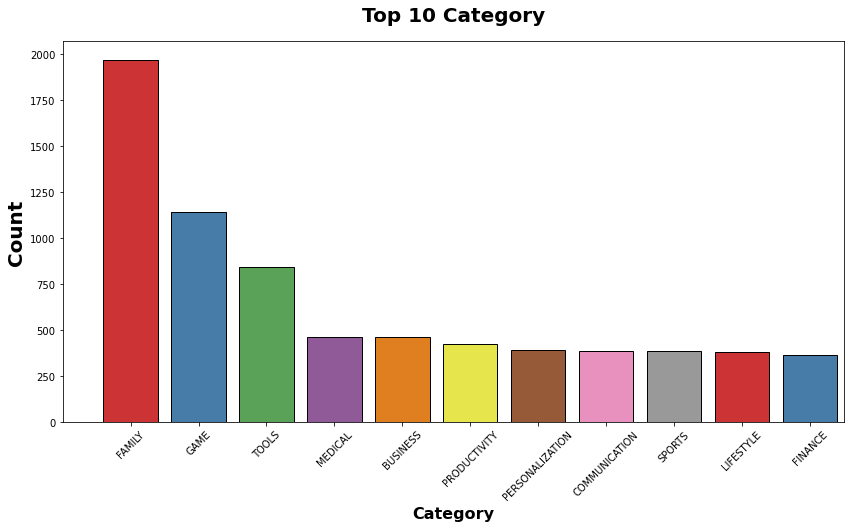

In [41]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Category", data=df_copy,ec = "black",palette="Set1",order = df['Category'].value_counts().index)
plt.title("Top 10 Category", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Category", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

In [57]:
* Report 
* Top 10 Category apps preffered by people :Family,game,tols,medical,business 

SyntaxError: invalid syntax (<ipython-input-57-3357cf67e328>, line 2)

df_copy.App.value_counts()[0:10]

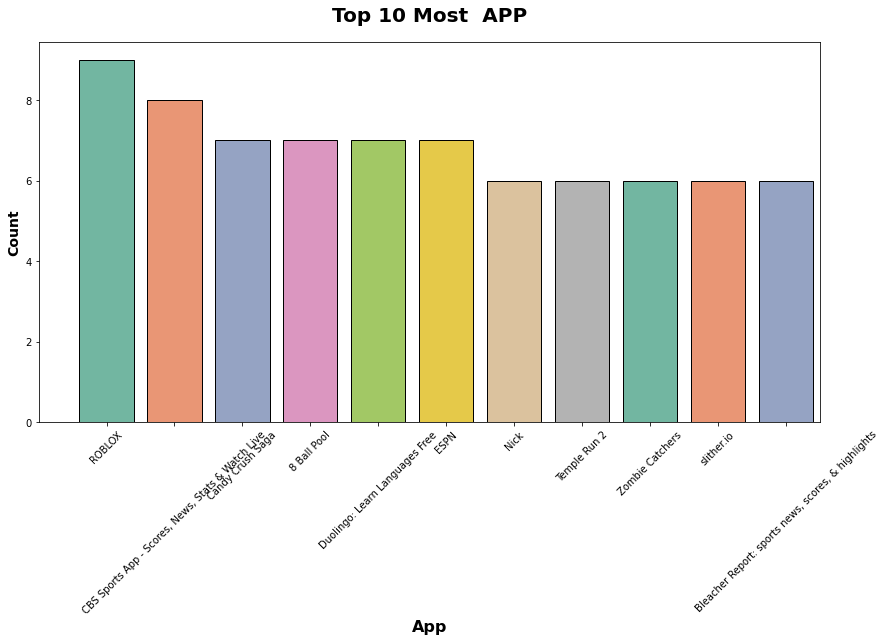

In [56]:
plt.subplots(figsize=(14,7))
sns.countplot(x="App", data=df,ec = "black",palette="Set2",order = df["App"].value_counts().index)
plt.title("Top 10 Most  APP", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=14)
plt.xlabel("App", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

* Report
* Top 10 sold apps are ROBLOX,CBS sports ,8 ball etc 

In [44]:
favorite_App = df_copy.groupby('App').Installs.max()
favorite_App= favorite_App.to_frame().sort_values('Installs',ascending=False)[0:10]
favorite_App

,Installs
App,
Gmail,1000000000
Google Street View,1000000000
Subway Surfers,1000000000
Facebook,1000000000
Skype - free IM & video calls,1000000000
Google,1000000000
Google Chrome: Fast & Secure,1000000000
Google Drive,1000000000
Google News,1000000000


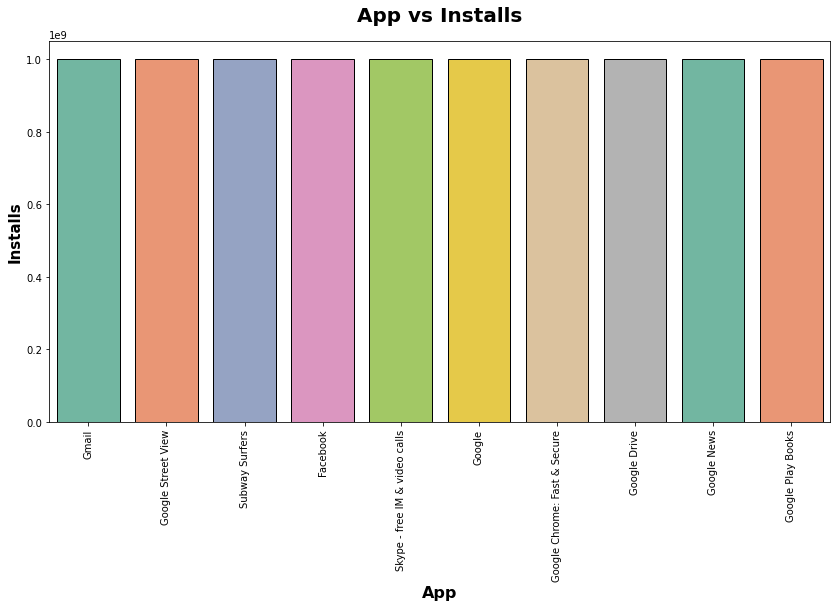

In [45]:
plt.subplots(figsize=(14,7))
sns.barplot(x=favorite_App.index, y=favorite_App.Installs,ec = "black",palette="Set2")
plt.title("App vs Installs", weight="bold",fontsize=20, pad=20)
plt.ylabel("Installs", weight="bold", fontsize=15)
plt.xlabel("App", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Report
**  Gmail,Google street view ,Subway,Facebook,Skype  etc are most installed appl

In [53]:

unfavorite_App = df_copy.groupby('App').Installs.min()
unfavorite_App1=unfavorite_App.to_frame().sort_values('Installs',ascending=True)[0:25]
unfavorite_App1

,Installs
App,
EG | Explore Folegandros,0
cronometra-br,0
Eu sou Rico,0
Eu Sou Rico,0
Popsicle Launcher for Android P 9.0 launcher,0
Ain Arabic Kids Alif Ba ta,0
AP Series Solution Pro,0
CX Network,0
Test Application DT 02,0


In [50]:
unfavorite_App

App
"i DT" Fútbol. Todos Somos Técnicos.                    500
+Download 4 Instagram Twitter                       1000000
- Free Comics - Comic Apps                            10000
.R                                                    10000
/u/app                                                10000
                                                     ...   
뽕티비 - 개인방송, 인터넷방송, BJ방송                              100000
💎 I'm rich                                            10000
💘 WhatsLov: Smileys of love, stickers and GIF       1000000
📏 Smart Ruler ↔️ cm/inch measuring for homework!      10000
🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    1000000
Name: Installs, Length: 9659, dtype: int32

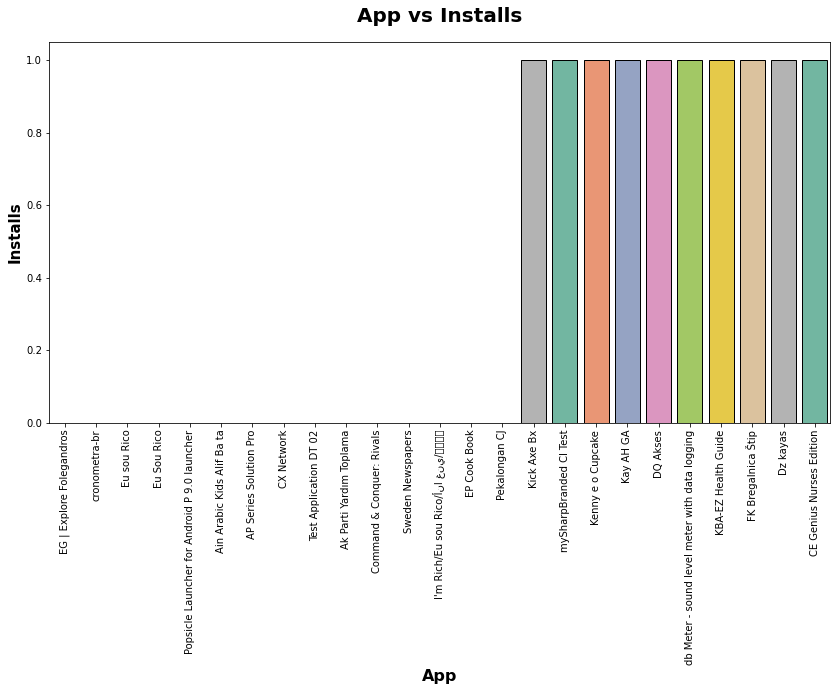

In [54]:
plt.subplots(figsize=(14,7))
sns.barplot(x=unfavorite_App1.index, y=unfavorite_App1.Installs,ec = "black",palette="Set2")
plt.title("App vs Installs", weight="bold",fontsize=20, pad=20)
plt.ylabel("Installs", weight="bold", fontsize=15)
plt.xlabel("App", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

* Report
* Above apps have 0 and 1 install which means people are not interested  in installing them

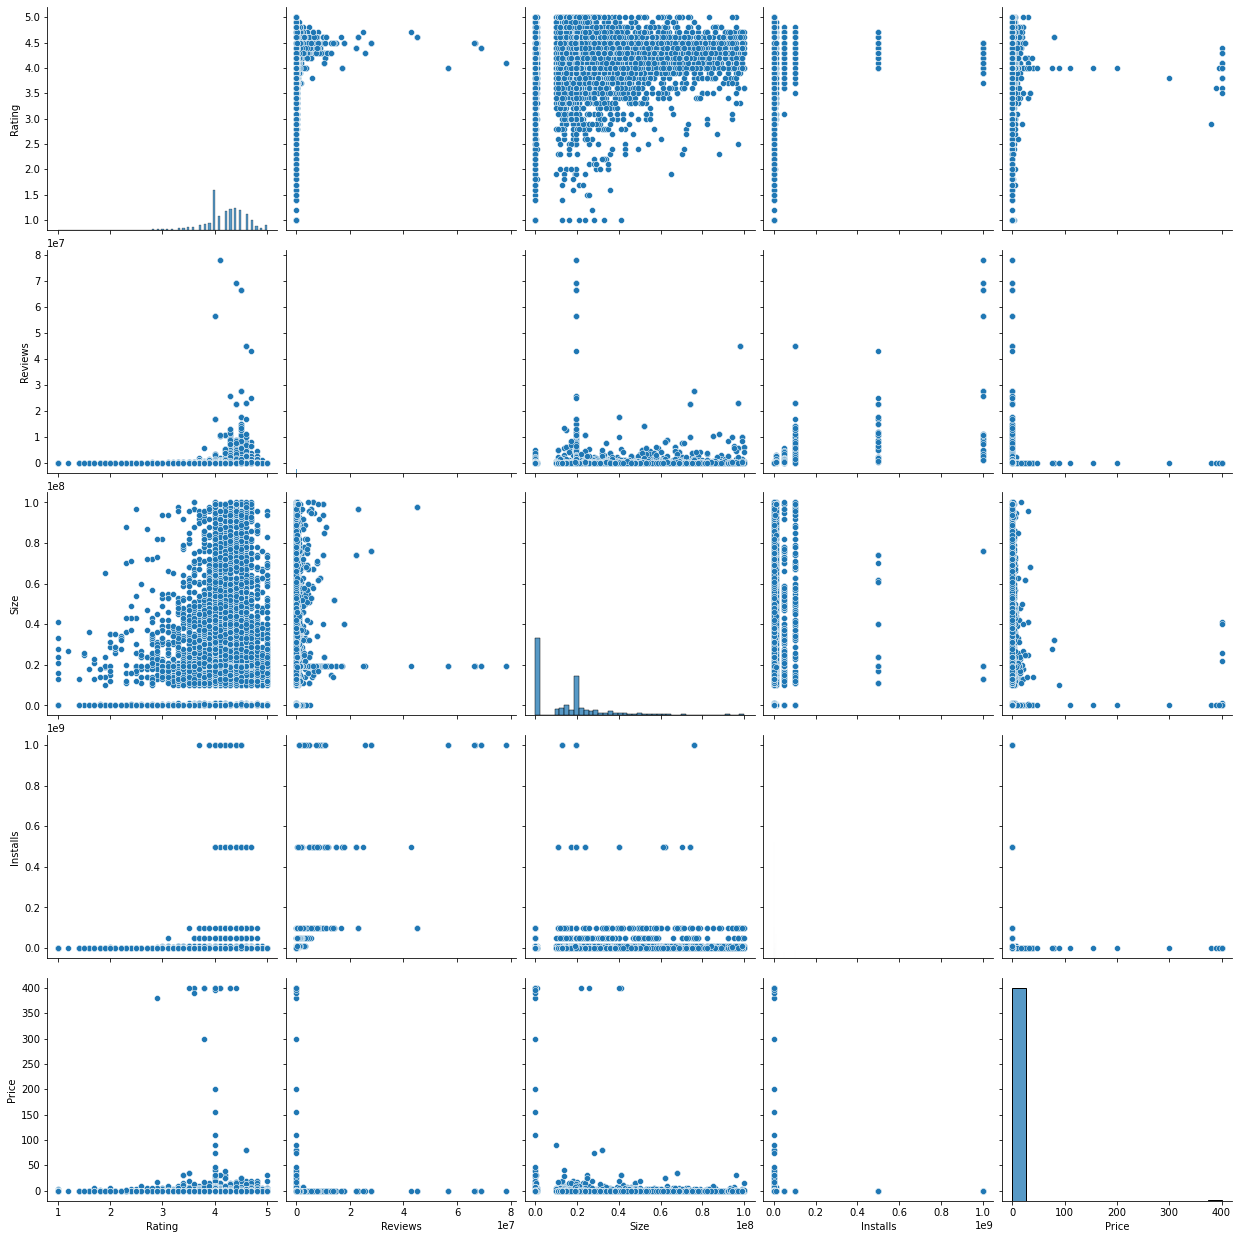

In [59]:
sns.pairplot(df_copy, height=3.5)

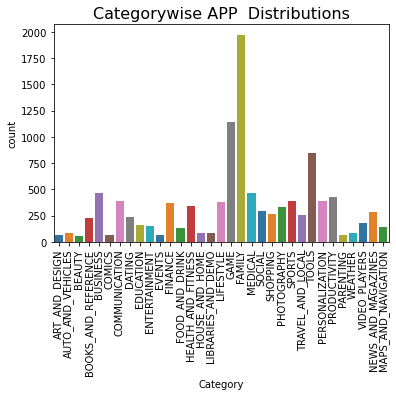

In [71]:
figsize=(30,30)
sns.countplot('Category', data=df_copy, palette="tab10")
plt.title("Categorywise APP  Distributions", fontsize=16)
plt.xticks(rotation=90)
plt.show()

### Report
* Categorywise Family Apps are most preffered